# Project Proposal

### Title: Given these 13 factors, does the patient have heart disease?


Given these 13 factors, does the patient have heart disease?

1.age: age in years

2.sex: sex (1 = male; 0 = female)

3.cp: chest pain type
-1: typical angina
-2: atypical angina
-3: non-anginal pain
-4: asymptomatic

4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5.chol: serum cholestoral in mg/dl

6.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7.restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8.thalach: maximum heart rate achieved

9.exang: exercise induced angina (1 = yes; 0 = no)

10.oldpeak = ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment
-1: upsloping
-2: flat 
-3: downsloping

12.ca: number of major vessels (0-3) colored by fluoroscopy

13.thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

14 **** num: diagnosis of heart disease
-0: < 50% diameter narrowing
-1: > 50% diameter narrowing

https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease


### Introduction:

Heart disease encompasses a group of conditions that can impair the structure or function of the heart. There are risk factors that increase heart disease that cannot be controlled such as sex, age, and genetics. The Heart Disease dataset from the UCI Machine Learning Repository examines the relationship between  13 factors and their effect on heart disease. The objective of our project is to examine some of these potential factors to identify patterns and make predictions that answer our research question: Given these 13 factors, does the patient have heart disease? 

### Preliminary exploratory data analysis:

In [28]:
library(tidyverse)

In [29]:
cleavland <-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)
colnames(cleavland) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
cleavland <- cleavland |>
    mutate(Number_of_Major_Vessels = as.numeric(Number_of_Major_Vessels)) |>
    mutate(Thal = as.numeric(Thal))       

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [30]:
cleavland0 <- cleavland |>
    filter(Heart_Disease_Diagnosis == 0)
cleavland1 <- cleavland |>
    filter(Heart_Disease_Diagnosis != 0) |>
    mutate(Heart_Disease_Diagnosis = 1)
cleavland <- rbind(cleavland0, cleavland1)

In [31]:
library(tidymodels)

In [32]:
set.seed(1)
data_split <- initial_split(cleavland, prop = 0.75, strata = Heart_Disease_Diagnosis)
training_data <- training(data_split)
testing_date <- testing(data_split)
training_data

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
57,1,3,150,168,0,0,174,0,1.6,1,0,3,0
49,1,2,130,266,0,0,171,0,0.6,1,0,3,0
64,1,1,110,211,0,2,144,1,1.8,2,0,3,0
58,0,1,150,283,1,2,162,0,1.0,1,0,3,0


In [33]:
mean_table <- training_data |>
    colMeans(na.rm = TRUE) 
mean_table.matrix = matrix(data = mean_table, nrow = 1, byrow = TRUE)
mean_table.df = as.data.frame(mean_table.matrix)
colnames(mean_table.df) = c("Age", "Sex", "Chest_Pain_Type", "Resting_Blood_Pressure", "Cholesterol", "Fasting_BloodSugar",
                        "Resting_ECG", "Max_Heart_Rate", "Exercise_Induced_Angina", "ST_Depression", "Slope",
                         "Number_of_Major_Vessels", "Thal", "Heart_Disease_Diagnosis")
mean_table = mean_table.df
mean_table

Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_BloodSugar,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,ST_Depression,Slope,Number_of_Major_Vessels,Thal,Heart_Disease_Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.9207,0.6828194,3.15859,132.7709,246.9604,0.1453744,0.9911894,149.3084,0.3259912,1.04185,1.603524,0.6977778,4.725664,0.4581498


`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


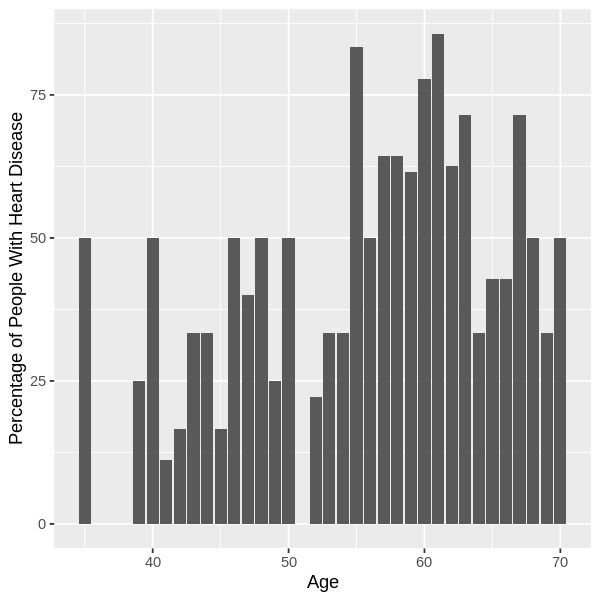

In [34]:
heart_age_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Age, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_age_table <- merge(heart_age_table0, heart_age_table1, by="Age") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)

heart_age_plot <- ggplot(heart_age_table, aes(x = Age, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "Age", y = "Percentage of People With Heart Disease")
heart_age_plot

`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'Resting_Blood_Pressure'. You can override
using the `.groups` argument.


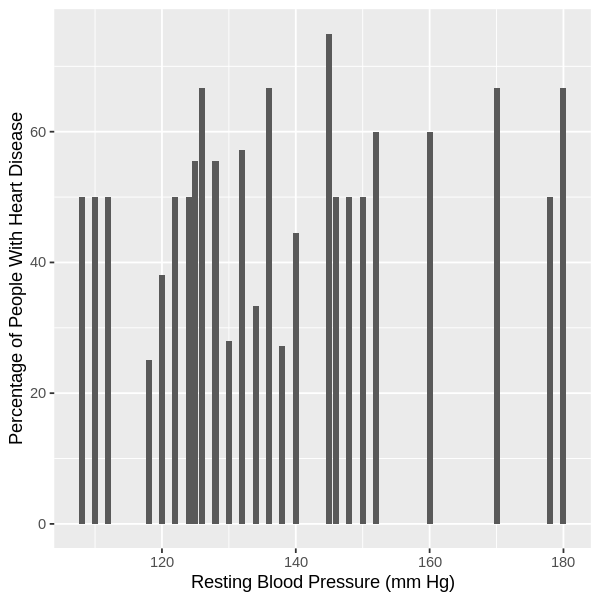

In [35]:
heart_bp_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Resting_Blood_Pressure, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_bp_table <- merge(heart_bp_table0, heart_bp_table1, by="Resting_Blood_Pressure") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)

heart_bp_plot <- ggplot(heart_bp_table, aes(x = Resting_Blood_Pressure, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "Resting Blood Pressure (mm Hg)", y = "Percentage of People With Heart Disease")
heart_bp_plot

`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Cholesterol'. You can override using the
`.groups` argument.


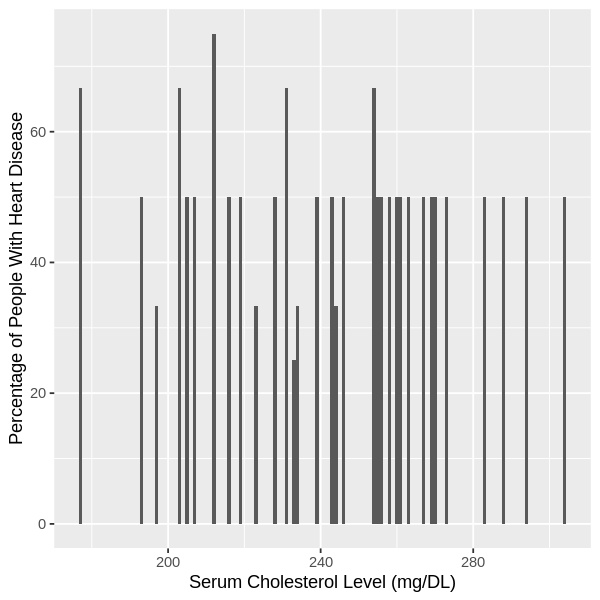

In [36]:
heart_chol_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Cholesterol, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_chol_table <- merge(heart_chol_table0, heart_chol_table1, by="Cholesterol") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)


heart_chol_plot <- ggplot(heart_chol_table, aes(x = Cholesterol, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "Serum Cholesterol Level (mg/DL)", y = "Percentage of People With Heart Disease")
heart_chol_plot

`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'Max_Heart_Rate'. You can override using
the `.groups` argument.


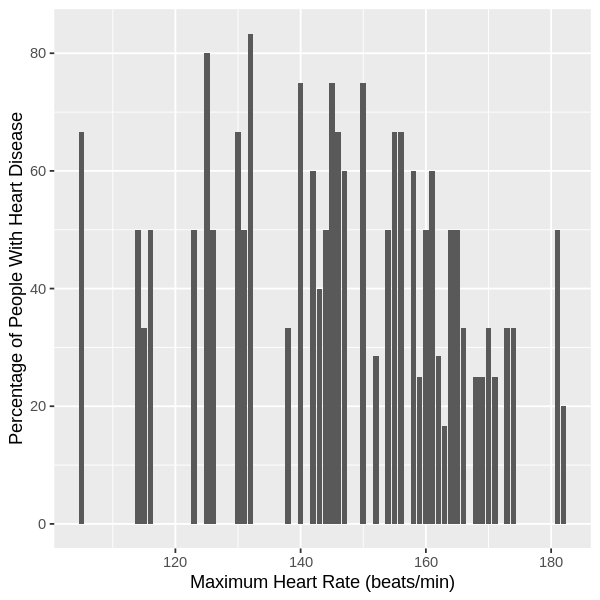

In [37]:
heart_hr_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(Max_Heart_Rate, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_hr_table <- merge(heart_hr_table0, heart_hr_table1, by="Max_Heart_Rate") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)

heart_hr_plot <- ggplot(heart_hr_table, aes(x = Max_Heart_Rate, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "Maximum Heart Rate (beats/min)", y = "Percentage of People With Heart Disease")
heart_hr_plot

`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'ST_Depression'. You can override using the
`.groups` argument.


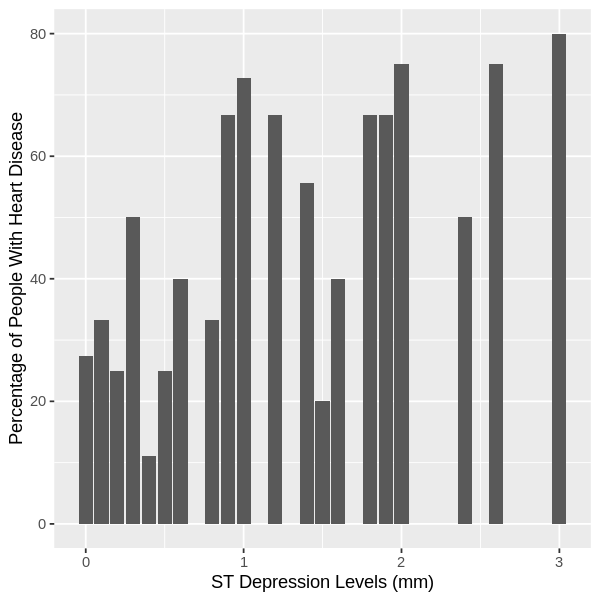

In [38]:
heart_st_table0 <- training_data |>
               filter(Heart_Disease_Diagnosis == 0) |>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_table1 <- training_data |>
               filter(Heart_Disease_Diagnosis == 1)|>
               group_by(ST_Depression, Heart_Disease_Diagnosis) |>
               summarize(count = n()) 

heart_st_table <- merge(heart_st_table0, heart_st_table1, by="ST_Depression") |>
                     rename("HeartPositive" = count.y, "HeartNegative" = count.x) |>
                     select(-Heart_Disease_Diagnosis.x, -Heart_Disease_Diagnosis.y) |>
                     mutate(proportion = (HeartPositive/(HeartNegative+HeartPositive))*100)

heart_st_plot <- ggplot(heart_st_table, aes(x = ST_Depression, y = proportion)) + 
                 geom_bar(stat = "identity") +
                 labs(x = "ST Depression Levels (mm)", y = "Percentage of People With Heart Disease")
heart_st_plot

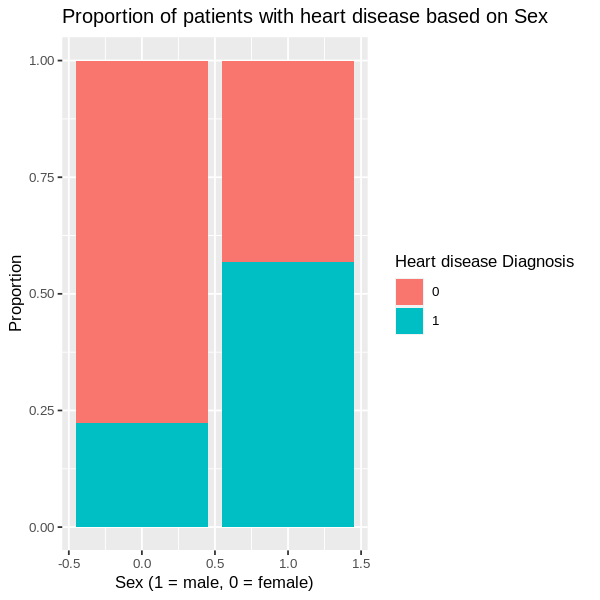

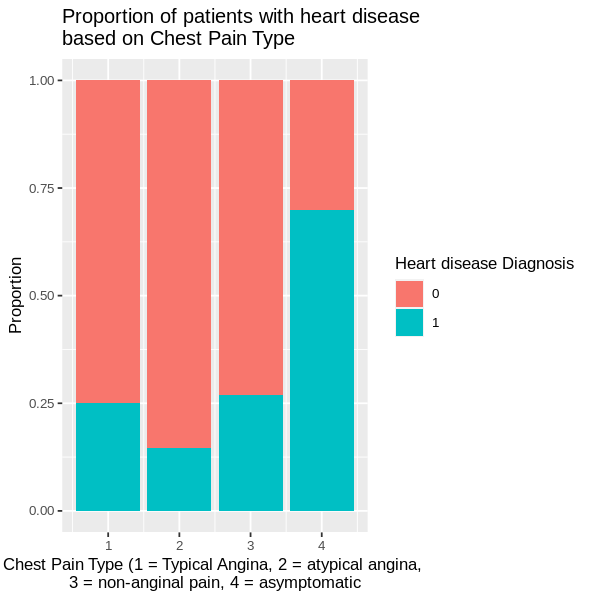

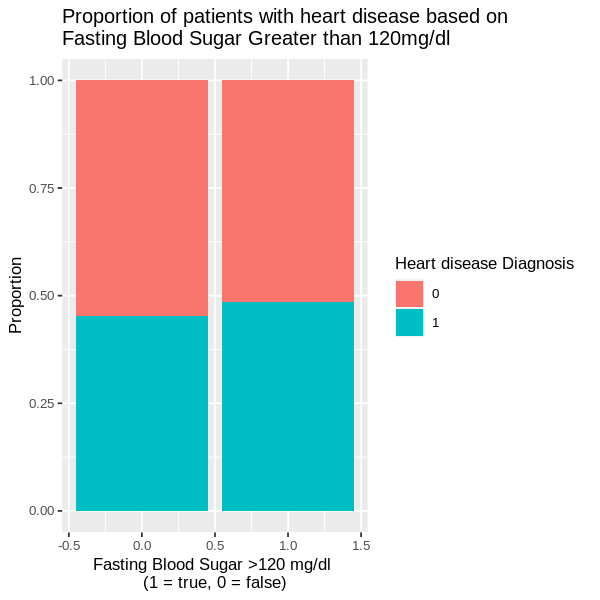

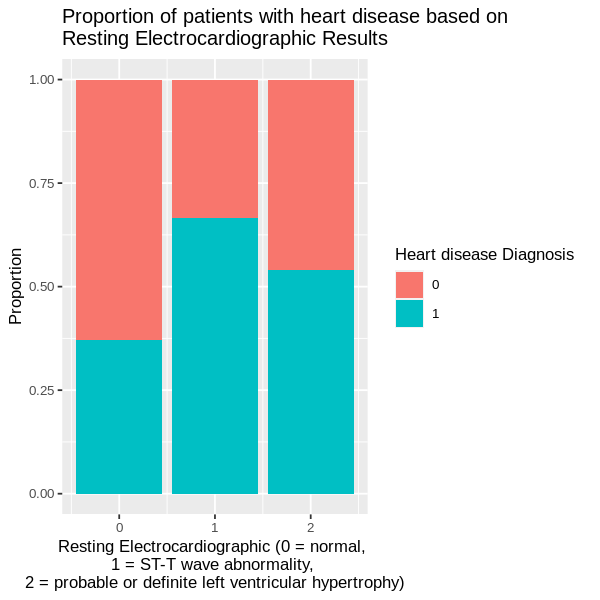

In [39]:
options(repr.plot.width = 5, repr.plot.height = 5)


sex_plot <- training_data |>
   ggplot(aes(x = Sex, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Sex (1 = male, 0 = female)", y = "Proportion", fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease based on Sex") +
   theme(text = element_text(size = 10))
sex_plot

cp_type_plot <- training_data |>
   ggplot(aes(x = Chest_Pain_Type, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Chest Pain Type (1 = Typical Angina, 2 = atypical angina, \n3 = non-anginal pain, 4 = asymptomatic", 
        y = "Proportion", fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease \nbased on Chest Pain Type") +
   theme(text = element_text(size = 10))
cp_type_plot

fbs_plot <- training_data |>
   ggplot(aes(x = Fasting_BloodSugar, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Fasting Blood Sugar >120 mg/dl \n(1 = true, 0 = false)", 
        y = "Proportion", fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease based on \nFasting Blood Sugar Greater than 120mg/dl") +
   theme(text = element_text(size = 10))
fbs_plot

restecg_plot <- training_data |>
   ggplot(aes(x = Resting_ECG, fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = "fill") + 
   labs(x = "Resting Electrocardiographic (0 = normal, \n1 = ST-T wave abnormality, \n2 = probable or definite left ventricular hypertrophy)",
        y = "Proportion", fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease based on \nResting Electrocardiographic Results") +
   theme(text = element_text(size = 10)) 
restecg_plot

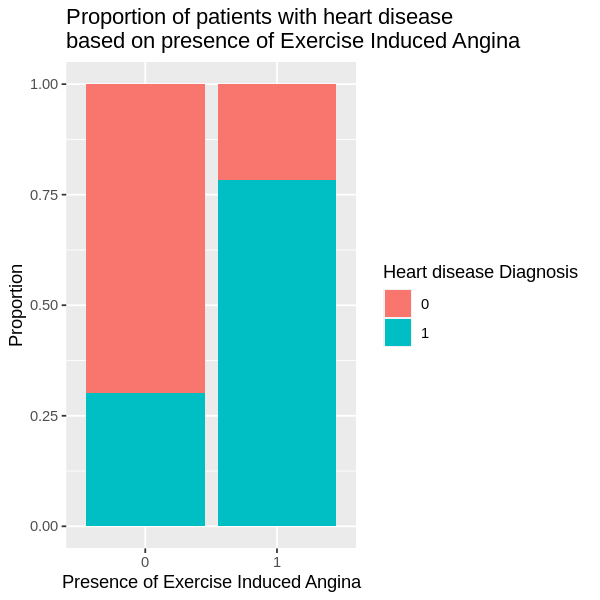

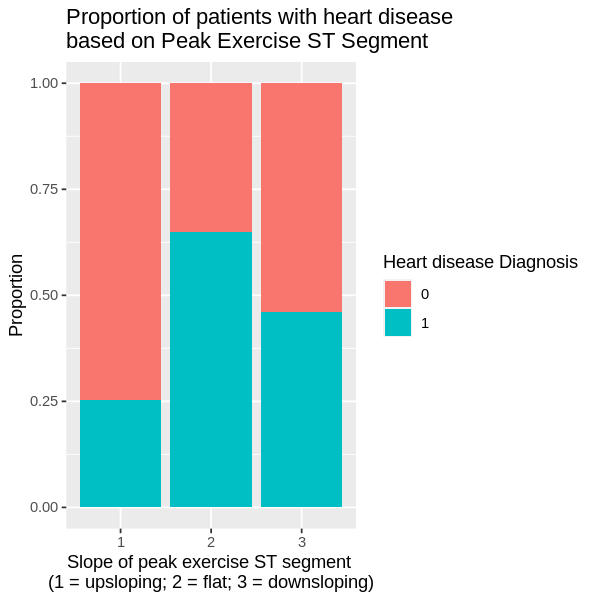

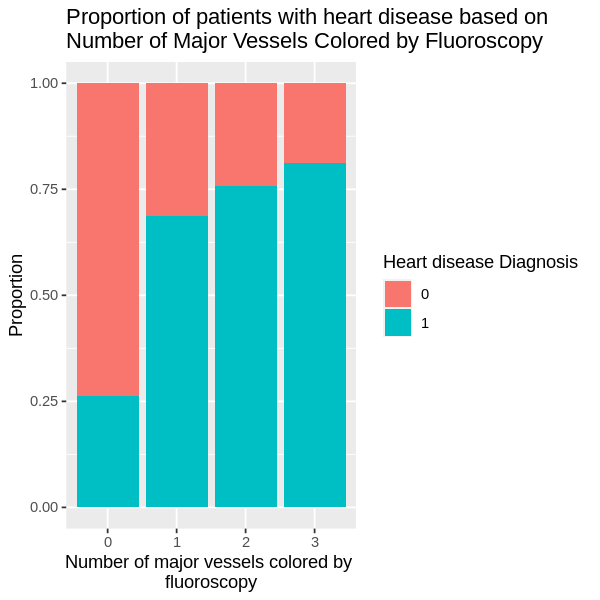

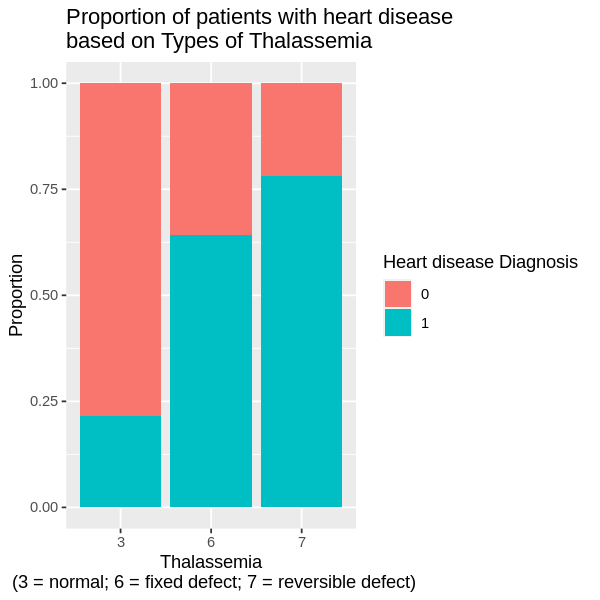

In [40]:
bar_plot9 <- training_data |>
   ggplot(aes(x = as_factor(Exercise_Induced_Angina), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Presence of Exercise Induced Angina") +
   ylab("Proportion") +
   labs(fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease \nbased on presence of Exercise Induced Angina")
bar_plot9

bar_plot11 <- training_data |>
   ggplot(aes(x = as_factor(Slope), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Slope of peak exercise ST segment \n(1 = upsloping; 2 = flat; 3 = downsloping)") +
   ylab("Proportion") +
   labs(fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease \nbased on Peak Exercise ST Segment")
bar_plot11

bar_plot12 <- training_data |>
   filter(!is.na(Number_of_Major_Vessels)) |>
   ggplot(aes(x = as_factor(Number_of_Major_Vessels), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Number of major vessels colored by \nfluoroscopy") +
   ylab("Proportion") +
   labs(fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease based on \nNumber of Major Vessels Colored by Fluoroscopy")
bar_plot12

bar_plot13 <- training_data |>
   filter(!is.na(Thal)) |>
   ggplot(aes(x = as_factor(Thal), fill = as_factor(Heart_Disease_Diagnosis))) + 
   geom_bar(position = 'fill') + 
   xlab("Thalassemia\n (3 = normal; 6 = fixed defect; 7 = reversible defect)") +
   ylab("Proportion") +
   labs(fill = "Heart disease Diagnosis") +
   ggtitle("Proportion of patients with heart disease \nbased on Types of Thalassemia")
bar_plot13

### Methods:
We will be conducting predictor variable selection using all 13 variables in our dataset to determine their relevance in predicting heart disease diagnosis. To confirm our choice of variables, we will examine the bar chart visualization (percentage of people with heart disease against predictor variable). Continuous variables and categorical variables were visualized with different y-axis to help us visualize trends better. Then, we will use those subsetted variables to predict if a patient has heart disease using K-nearest neighbor classification tuned using a 5-fold cross-validation. 
For our visualization, we plan on plotting the estimated average accuracy of the classifier versus the K values that we used in our cross-validation. This visualization is relevant because it will help us choose a K value that maximizes accuracy, which is important as we want our model to make a prediction that is as accurate as possible.

### Expected outcomes and significance:
We expect to find that some of the variables are indicators of heart disease. Such findings can help inform doctors and patients of warning signs that they may be developing or having heart disease. They can also help doctors target specific heart disease factors for treatment such as lowering blood sugar or cholesterol levels, for example. This could lead to some future questions:
What other factors can lead to heart disease?
Which factor has the greatest effect on heart disease diagnosis?
